In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\DS-Assignment Dataset and instructions\DS-Assignment Dataset and instructions\P2- OfficeSupplies Data.csv")

In [4]:
df.head(10)

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95
5,15-Aug-14,East,Richard,Pencil,35,4.99
6,24-Aug-14,West,James,Desk,3,275.00
7,01-Sep-14,Central,Smith,Desk,2,125.00
8,10-Sep-14,Central,Bill,Pencil,7,1.29
9,18-Sep-14,East,Richard,Pen Set,16,15.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderDate   43 non-null     object 
 1   Region      43 non-null     object 
 2   Rep         43 non-null     object 
 3   Item        43 non-null     object 
 4   Units       43 non-null     int64  
 5   Unit Price  43 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ KB


In [6]:
df.shape

(43, 6)

In [7]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Region'] = df['Region'].astype('string')
df['Rep'] = df['Rep'].astype('string')
df['Item'] = df['Item'].astype('string')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderDate   43 non-null     datetime64[ns]
 1   Region      43 non-null     string        
 2   Rep         43 non-null     string        
 3   Item        43 non-null     string        
 4   Units       43 non-null     int64         
 5   Unit Price  43 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), string(3)
memory usage: 2.1 KB


1. Sales Analysis:
   - What are the total sales for each product category?
   - Which product category has the highest sales?
   - Identify the top 10 best-selling products.

In [24]:
# for total sales 
df['total_sales'] = df['Units'] * df['Unit Price']
sales_per_category = df.groupby('Item')['total_sales'].sum().reset_index()
print("Total Sales Per Category :")
print(sales_per_category)

Total Sales Per Category :
      Item  total_sales
0   Binder      9577.65
1     Desk      1700.00
2      Pen      2045.22
3  Pen Set      4169.87
4   Pencil      2135.14


In [31]:
# max sales category 
max_sales_category = sales_per_category.loc[sales_per_category['total_sales'].idxmax()]
max_sales_category

Item            Binder
total_sales    9577.65
Name: 0, dtype: object

In [39]:
df['Item'].value_counts()

Binder     15
Pencil     13
Pen Set     7
Pen         5
Desk        3
Name: Item, dtype: Int64

In [37]:
# top 5 best-selling products (since we only have five item categories)
top_5 = sales_per_category.sort_values(by='total_sales' ,ascending=False)
top_5

,Item,total_sales
0,Binder,9577.65
3,Pen Set,4169.87
4,Pencil,2135.14
2,Pen,2045.22
1,Desk,1700.00


2.  Customer Analysis: 
   - Who are the top 10 customers by sales?
   - What is the total number of unique customers?
   - Analyze customer purchase frequency.
   
we will treat the 'Rep' column as customers

In [9]:
# top 10 customers
df['total_sales'] = df['Units'] * df['Unit Price']
sales_per_customer = df.groupby('Rep')['total_sales'].sum().reset_index()
top_10_customers = sales_per_customer.sort_values(by='total_sales', ascending=False).head(10)

# total number of unique customers
unique_customers = df['Rep'].nunique()

# customer purchase frequency
customer_purchase_freq = df['Rep'].value_counts()


In [10]:
print("Top 10 customers :")
print(top_10_customers)


Top 10 customers :
        Rep  total_sales
3   Matthew      3109.44
9     Susan      3102.30
0      Alex      2812.19
7   Richard      2363.04
1      Bill      1749.87
8     Smith      1641.43
4    Morgan      1387.77
2     James      1283.61
10   Thomas      1203.11
5      Nick       536.75


In [11]:
print("Total number of unique customers :")
print(unique_customers)

Total number of unique customers :
11


In [12]:
print("Customer purchase frequencies : ")
print(customer_purchase_freq)

Customer purchase frequencies : 
Richard    8
Bill       5
Alex       5
Matthew    4
James      4
Rachel     4
Morgan     3
Susan      3
Smith      3
Nick       2
Thomas     2
Name: Rep, dtype: Int64


3.  Time Series Analysis: 
   - What are the monthly sales trends over the past year?
   - Identify any seasonal patterns in the sales data.


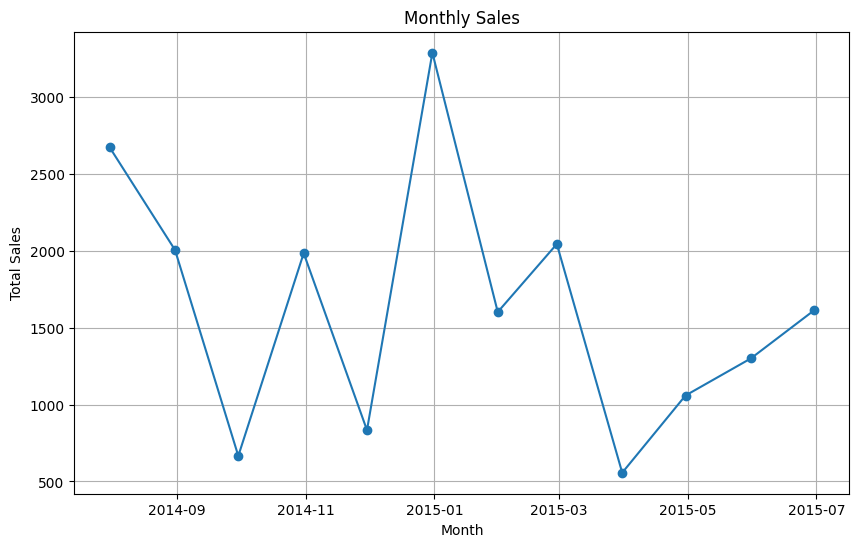

In [13]:
df.set_index('OrderDate', inplace=True)
# resampling data
monthly = df.resample('M')['total_sales'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly.values, marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['total_sales'], model='additive', period=12)  


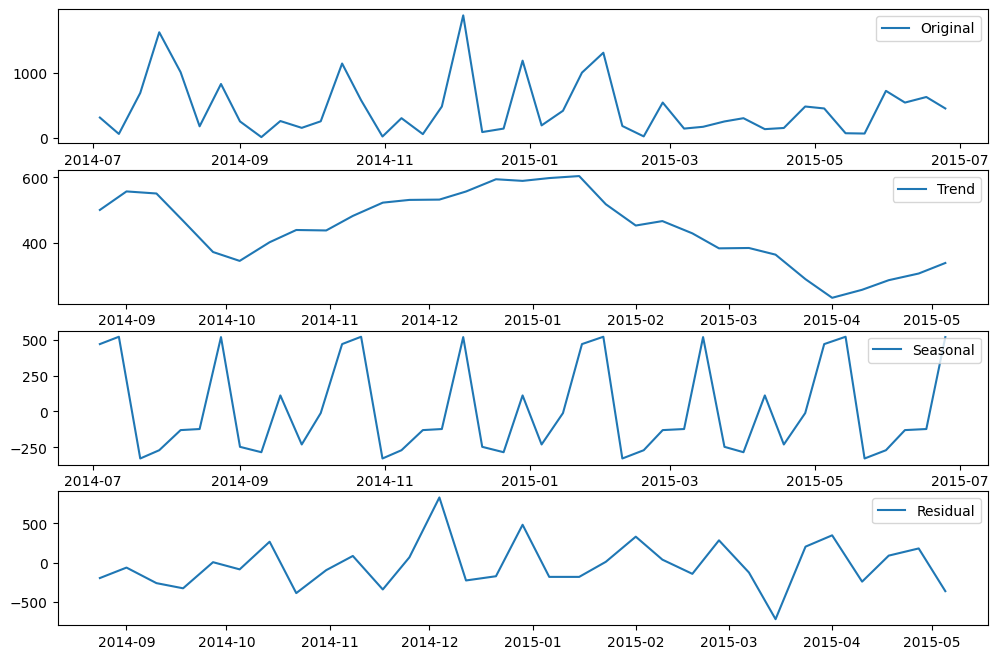

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['total_sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.show()

4.  Geographical Analysis: 
   - Which regions generate the most sales?
   - What are the sales trends across different regions?


In [16]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\DS-Assignment Dataset and instructions\DS-Assignment Dataset and instructions\P2- OfficeSupplies Data.csv")

In [19]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Region'] = df['Region'].astype('string')
df['Rep'] = df['Rep'].astype('string')
df['Item'] = df['Item'].astype('string')

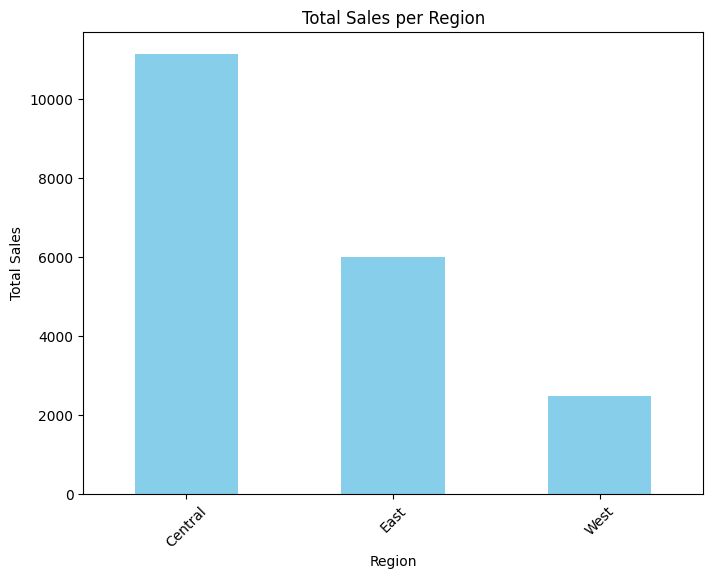

In [25]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d-%b-%y')
df['total_sales'] = df['Units'] * df['Unit Price']
sale_per_region = df.groupby('Region')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sale_per_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

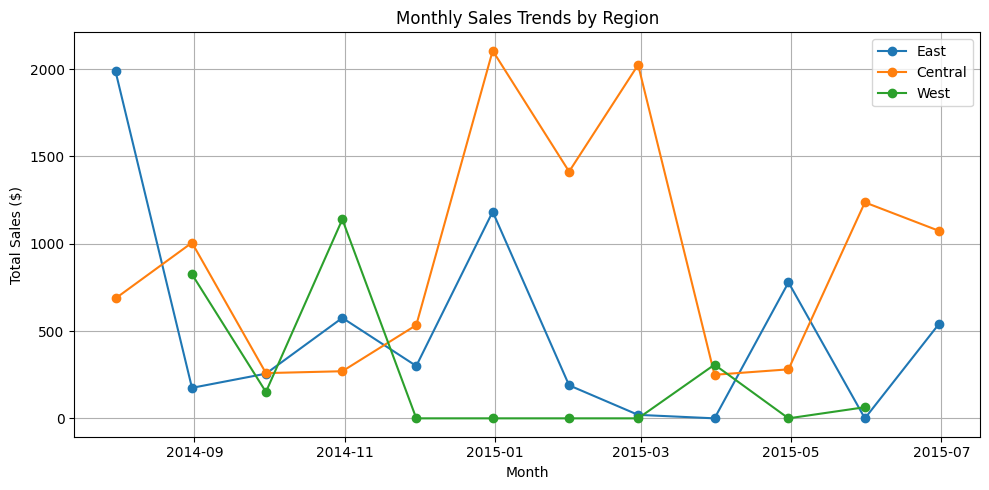

In [31]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

df['Total Sales'] = df['Units'] * df['Unit Price']

regions = df['Region'].unique()

plt.figure(figsize=(10, 5))

for region in regions:
    region_data = df[df['Region'] == region].resample('M', on='OrderDate')['Total Sales'].sum()
    plt.plot(region_data.index, region_data.values, marker='o', linestyle='-', label=region)

plt.title('Monthly Sales Trends by Region')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

5.  Profit Analysis: 
   - What is the total profit for each product category?
   - Identify the top 10 most profitable products.


Since, we do not have data for cost of an item, or the profit generated, we leave this portion.

This one would be similar to the first analysis we did for this case,

We will be working with cost and price difference.